In [1]:
# Interpretation of Model

In [2]:
## Load EDA
import pandas as pd
import numpy as np

In [3]:
# Load ML Pkgs
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




In [4]:
# Load Dataset
df = pd.read_csv("final.csv")

df.shape

In [5]:
df.head()

,Name,Nationality
0,Abdullah,India
1,Aamani,India
2,Aanaahad,India
3,Yashika Aannand,India
4,Aarathi,India


In [6]:
df.columns

Index(['Name', 'Nationality'], dtype='object')

In [7]:
df['Nationality'].unique()

array(['India', 'France', 'Italy', 'German', 'Japan', 'China',
       'United Kingdom', 'United States'], dtype=object)

In [8]:
class_names =['India', 'France', 'Italy', 'German', 'Japan', 'China',
       'United Kingdom', 'United States']

In [9]:
len(class_names)

8

In [10]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('final.csv')

# Assuming your DataFrame has columns 'name' and 'nationality'
# Replace 'nationality' with the actual column name in your dataset
nationality_counts = df['Nationality'].value_counts()

# Display the number of unique nationalities and their counts
print("Number of unique nationalities:", len(nationality_counts))
print("\nNationality counts:")
print(nationality_counts)


Number of unique nationalities: 8

Nationality counts:
Japan             17716
India             17672
German            17535
United States     17201
United Kingdom    16743
France            16729
Italy             16399
China             15214
Name: Nationality, dtype: int64


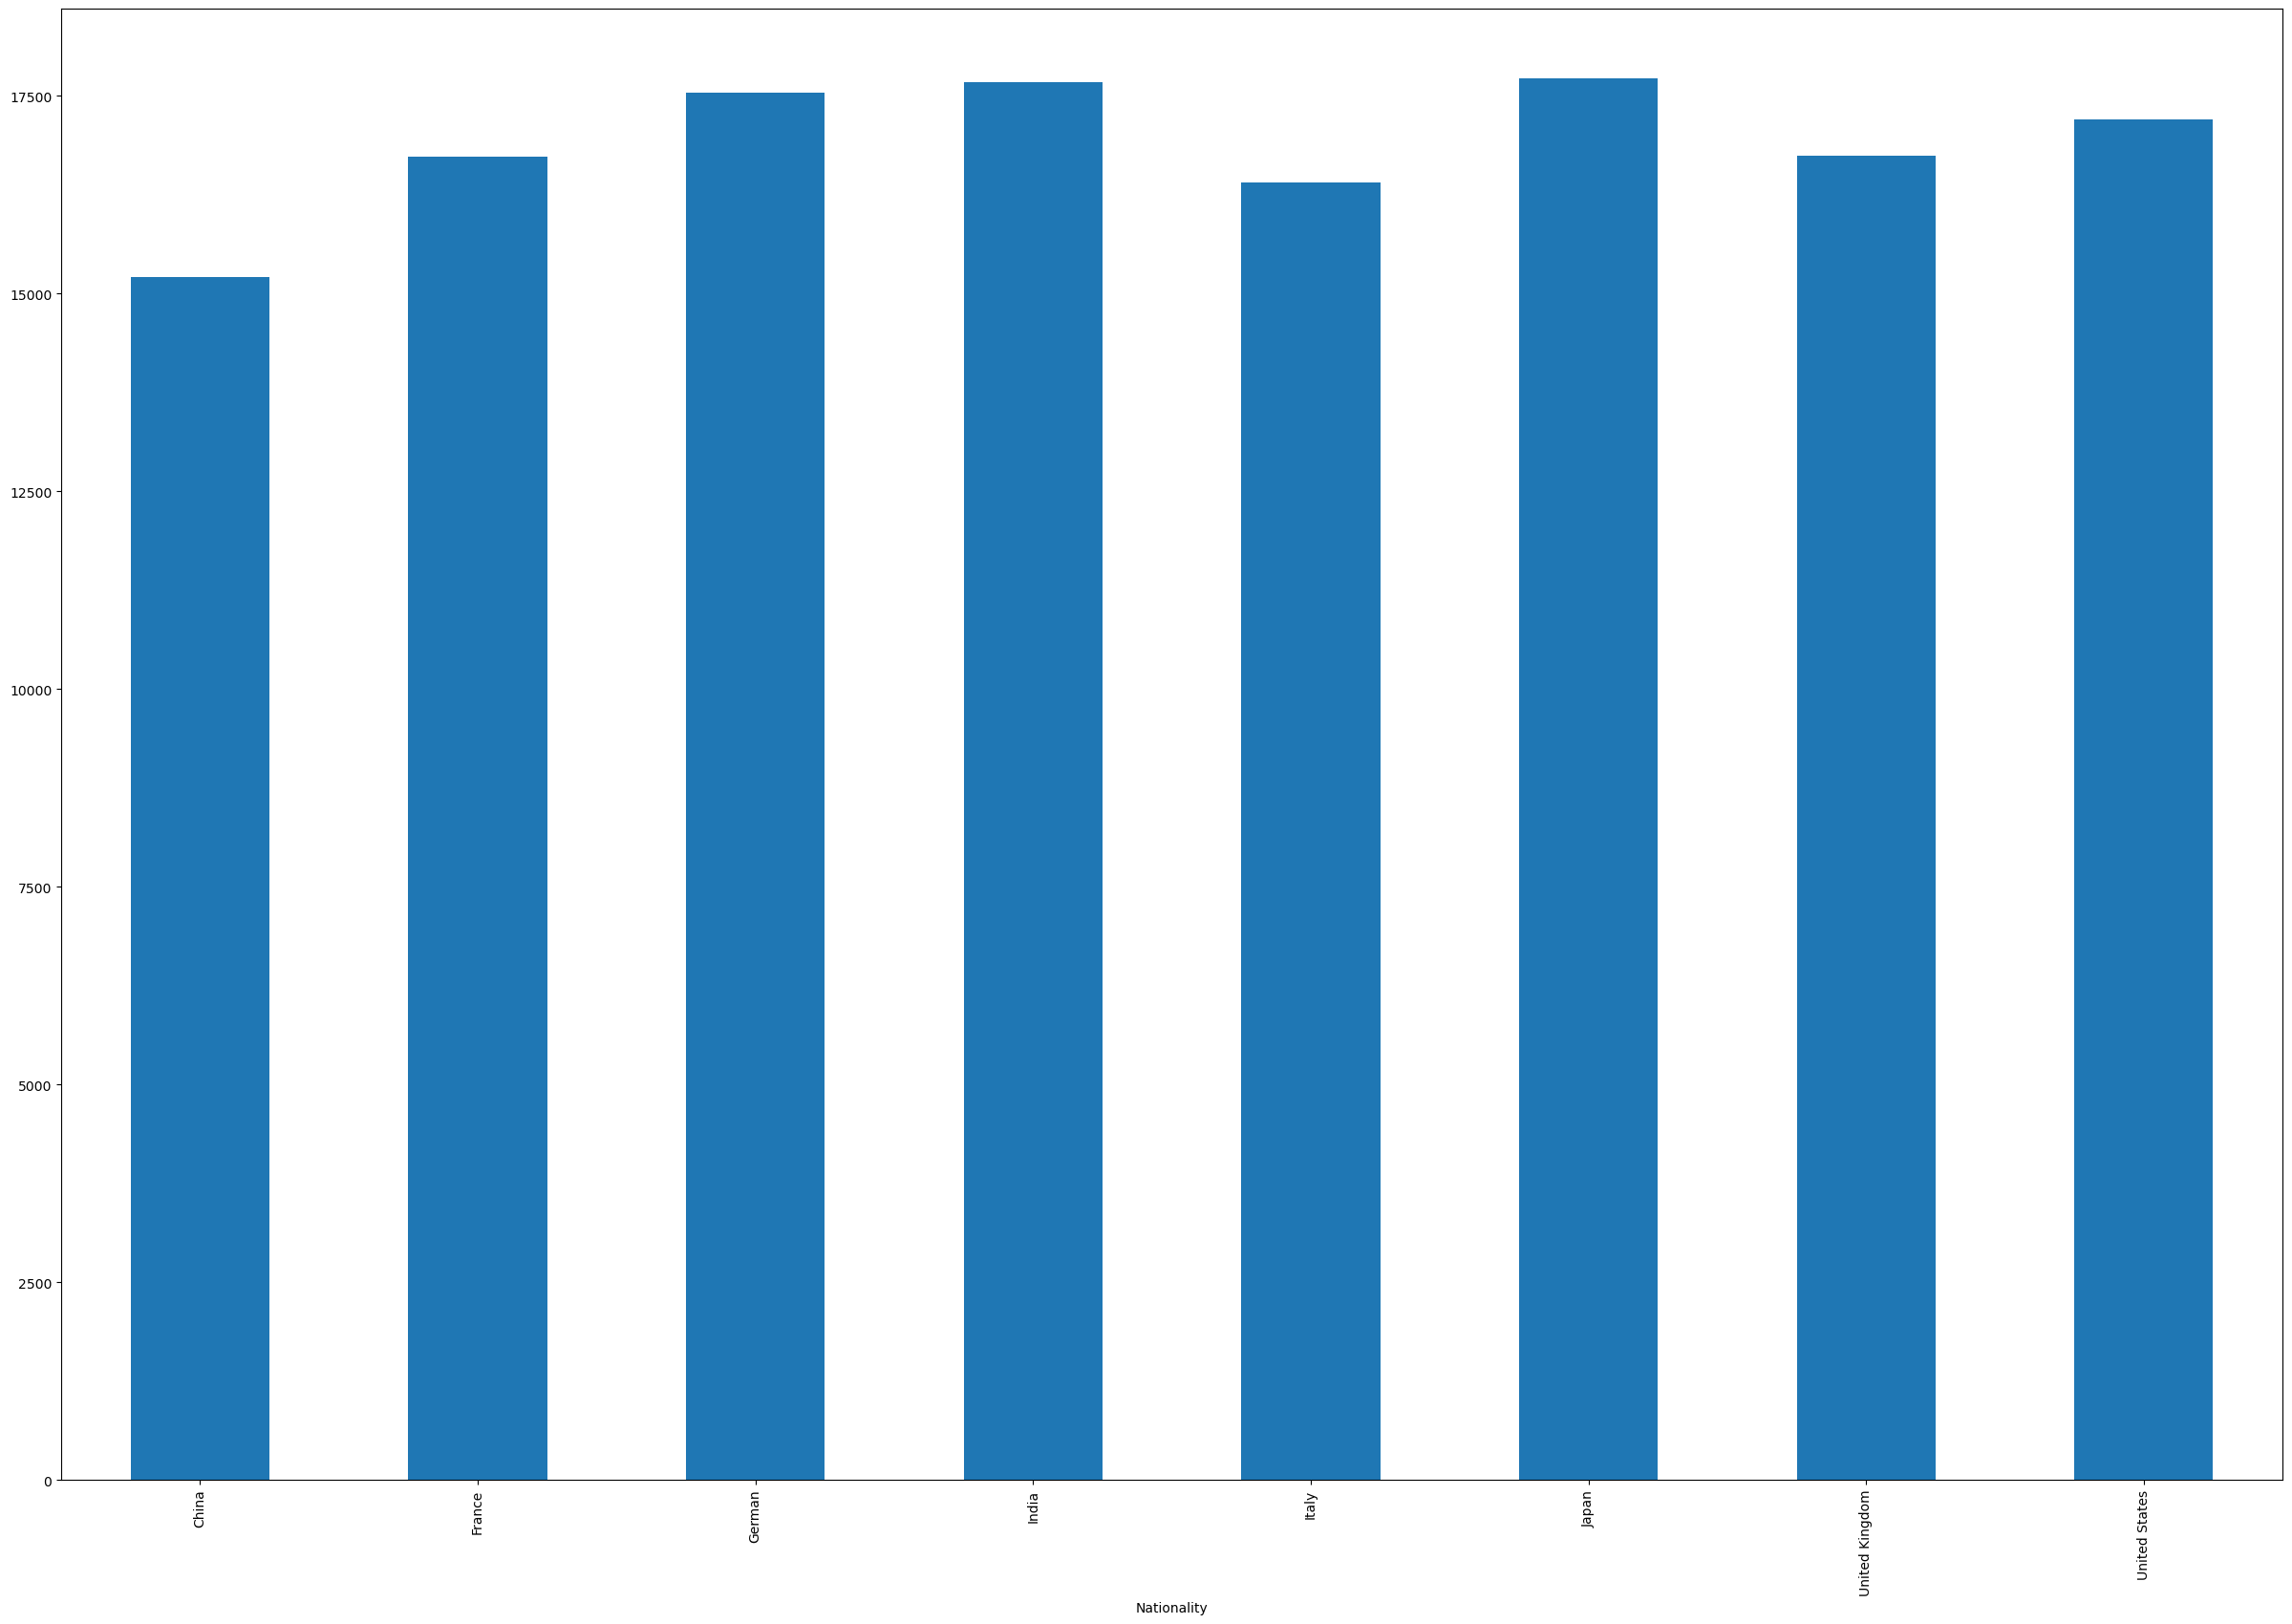

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
df.groupby('Nationality')['Name'].size().plot(kind='bar',figsize=(30,20))
plt.show()

In [12]:
# Features
Xfeatures = df['Name']
ylabels= df['Nationality']

In [13]:


# Assuming Xfeatures is a pandas DataFrame
Xfeatures = Xfeatures.replace(np.nan, 'NA')

# Vectorize Features
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)
Xfeatures = Xfeatures.dropna()




In [14]:
cv.get_feature_names_out()

array(['aab', 'aabid', 'aach', ..., 'žå', 'žæœ', 'ˆå½'], dtype=object)

In [15]:
# Split Dataset into Train/Test
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.2,random_state=42)

In [16]:
## Build Model
nv = MultinomialNB()
nv.fit(x_train,y_train)

MultinomialNB()

In [17]:
# Accuracy of Our Model
nv.score(x_test,y_test)

0.8052658827009836

In [18]:
pip install imblearn

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
over = SMOTE(sampling_strategy = { 'India' :17700,'German' : 17700,'United States':17500,'China':17000,'Japan':18000,'United Kingdom':17500,'France':17500,'Italy':17500})
X, ylabels = over.fit_resample(X,ylabels)
ylabels.value_counts()

C:\Users\USER\anaconda3\lib\site-packages\imblearn\utils\_validation.py:313: UserWarning: After over-sampling, the number of samples (18000) in class Japan will be larger than the number of samples in the majority class (class #Japan -> 17716)
  warnings.warn(


Japan             18000
India             17700
German            17700
France            17500
Italy             17500
United Kingdom    17500
United States     17500
China             17000
Name: Nationality, dtype: int64

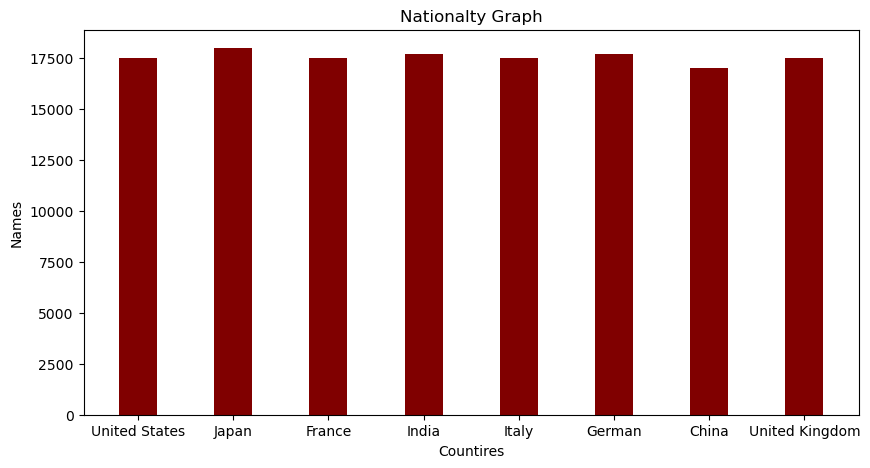

In [21]:
import numpy as np
import matplotlib.pyplot as plt 
 
  
# creating the dataset
data = {'United States':17500, 'Japan':18000, 'France':17500, 
        'India':17700,'Italy':17500,'German':17700,'China':17000,'United Kingdom':17500}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Countires")
plt.ylabel("Names")
plt.title("Nationalty Graph")
plt.show()

In [22]:
# Split Dataset into Train/Test
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.2,random_state=42)

In [23]:
## Build Model
nv = MultinomialNB()
nv.fit(x_train,y_train)

MultinomialNB()

In [24]:
# Accuracy of Our Model
nv.score(x_test,y_test)

0.8031695156695157

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [27]:
# Create a KFold object with K folds
kfold = KFold(n_splits=20, shuffle=True, random_state=42)

# Perform K-fold cross-validation on the training set
cv_results = cross_val_score(nv, x_train, y_train, cv=kfold)

# Print the cross-validation results
print("Cross-Validation Accuracy: %.2f%%" % (cv_results.mean() * 100))
print("Cross-Validation Standard Deviation: %.2f%%" % (cv_results.std() * 100))

Cross-Validation Accuracy: 80.35%
Cross-Validation Standard Deviation: 0.67%


In [28]:
sample1 = ["Rohit Sharma"]

In [29]:
vect1 = cv.transform(sample1).toarray()

In [30]:
nv.predict(vect1)

array(['India'], dtype='<U14')

In [31]:
sample2= ["Li","John","singh","Vladmir"]

In [32]:
vect2 = cv.transform(sample2).toarray()

In [34]:
nv.predict(vect2)

array(['China', 'United Kingdom', 'India', 'Japan'], dtype='<U14')

In [35]:
# Logistic Regression
logit = LogisticRegression()
logit.fit(x_train,y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
logit.score(x_test,y_test)

0.7993589743589744

In [38]:
# Single Prediction with Logit
logit.predict(vect1)

array(['India'], dtype=object)

In [39]:
# Multiple Prediction
logit.predict(vect2)

array(['China', 'United Kingdom', 'India', 'India'], dtype=object)

In [40]:
sample_3 = ["katya","natasha"]

In [41]:
vect3 = cv.transform(sample_3).toarray()

In [42]:
logit.predict(vect3)

array(['India', 'United Kingdom'], dtype=object)

In [43]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a dataset with features (X) and labels (y)
# X and y should be NumPy arrays or Pandas DataFrames

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7214031339031339


In [44]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have a dataset with features (X) and labels (y)
# X and y should be NumPy arrays or Pandas DataFrames

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7788817663817664


In [45]:
# Save Our Vectorizer
import joblib


In [46]:
nationality_vectorizer = open("nationality_vectorizer.pkl","wb")
joblib.dump(cv,nationality_vectorizer)

In [47]:
nationality_vectorizer.close()

In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.preprocessing import LabelEncoder


In [49]:
y_pred=logit.predict(x_test)
print(y_pred)
# Assuming 'nationality_column' is the column in your dataset containing nationalities
label_encoder = LabelEncoder()
encoded_pred = label_encoder.fit_transform(y_pred)
print(encoded_pred)

['United Kingdom' 'United States' 'Italy' ... 'United States' 'Japan'
 'India']
[6 7 4 ... 7 5 3]


In [50]:
y_test.values
from sklearn.preprocessing import LabelEncoder

# Assuming 'nationality_column' is the column in your dataset containing nationalities
label_encoder = LabelEncoder()
encoded_nationalities = label_encoder.fit_transform(y_test.values)
print(encoded_nationalities)

[6 7 1 ... 6 5 1]


In [51]:
print("MAE",mean_absolute_error(encoded_nationalities,encoded_pred))

MAE 0.5299145299145299


In [52]:
print("MSE",mean_squared_error(encoded_nationalities,encoded_pred))

MSE 1.993874643874644


In [53]:
print("RMSE",np.sqrt(mean_squared_error(encoded_nationalities,encoded_pred)))

RMSE 1.412046261237444


In [54]:
print("MSE",r2_score(encoded_nationalities,encoded_pred))
r2 = r2_score(encoded_nationalities,encoded_pred)

MSE 0.6175882538941294


In [55]:
# Adjusted R2 score
x_test.shape

(28080, 79213)

In [56]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.6075247868913434

In [57]:
class_names

['India',
 'France',
 'Italy',
 'German',
 'Japan',
 'China',
 'United Kingdom',
 'United States']

In [58]:
# Save Our Model
import joblib


In [59]:
nationality_nv_model = open("nationality_nv_model.pkl","wb")
joblib.dump(nv,nationality_nv_model)

In [60]:
nationality_nv_model.close()

In [61]:
nationality_logit_model = open("nationality_logit_model.pkl","wb")
joblib.dump(nv,nationality_logit_model)


In [62]:
nationality_logit_model.close()

In [63]:
import sklearn
print(sklearn.__version__)


1.2.1


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [65]:
X = df.drop('Nationality', axis=1)
y = df['Nationality']

# Encoding categorical variables (if needed)
le = LabelEncoder()
X['Name'] = le.fit_transform(X['Name'])

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building a classification model (e.g., Decision Tree)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test)

# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Additional metrics and classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[2302   93   86  151   54   69  133  144]
 [  97 2319  236  105  140   37  230  238]
 [  86  251 2322  119  218   46  181  233]
 [ 132  109  121 2476   85  115  209  253]
 [  50  145  202   79 2577   21  102  130]
 [  86   44   40   95   26 3205   44   68]
 [ 113  198  218  216  103   41 1681  791]
 [ 136  234  238  282  127   60  801 1499]]

Classification Report:
                precision    recall  f1-score   support

         China       0.77      0.76      0.76      3032
        France       0.68      0.68      0.68      3402
        German       0.67      0.67      0.67      3456
         India       0.70      0.71      0.71      3500
         Italy       0.77      0.78      0.78      3306
         Japan       0.89      0.89      0.89      3608
United Kingdom       0.50      0.50      0.50      3361
 United States       0.45      0.44      0.45      3377

      accuracy                           0.68     27042
     macro avg       0.68      0.68      0.68     2